# Classifying movie reviews : Binary Classification

The IMDB dataset :
*   25 000 reviews for training set
*   25 000 reviews for test set
*   Each contains 50% positive and 50% negative reviews

The dataset has already been processed, the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionnary.


In [2]:
from keras.datasets import imdb

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #num_words : only keep the top 10000 most frequently occuring words

In [9]:
train_data[0] #contains a list of integers < 10000 representing each word of the review 

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [10]:
train_labels[0]     #contains 1 (pos) and 0 (neg) target values

1

It's possible to decode a review with this trick :

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### PREPROCESSING :

The first step of preprocessing is turning data into tensors :
* integer tensor of shape (samples, word_indices)
* One-hot encode with a 10000-dimensional vector

We chose to the second solution here :

In [17]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train[0] #Now containing only 1s and 0s 

array([0., 1., 1., ..., 0., 0., 0.])

In [22]:
#Also vectorize the labels (already integers)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

The input data is vector and the labels are scalars (1s and 0s) : this is the easiest setup you'll ever encounter.

We chose reLu function as activation function for each neural (add non-linerity transformations and extend the hypothesis space).

We want an output probability between 0 and 1. This probability can be given by a sigmoïd activation function as output layer


In [23]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")     #Give scalar probability between 0 and 1
])

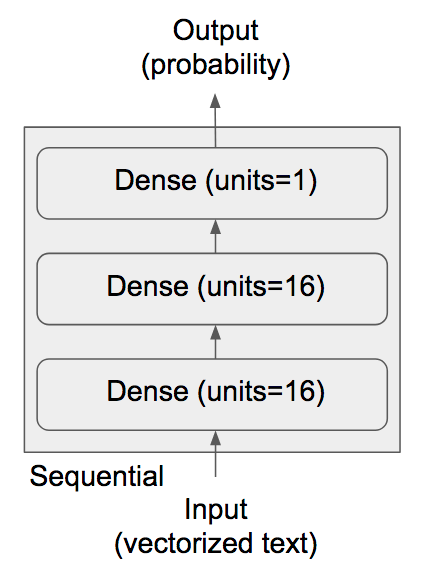

### COMPILING THE MODEL :



Finally, we have to determine our Loss Function and the Optimizer : 

As Loss Function we chose bineary_crossentropy because we facing a binary classification problem. Crossentropy is the quantity that mesures the dsitance between probability distributions or between gound-truth distribution and our predictions.

For optimizer we chose rmsprop. 

In [25]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

We can configure the parameters of our optimizer or passing custom loss function or metrics with :

In [33]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### VALIDATION SET : 

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### TRAINING :

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

#model.fit() returns a History object 
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.5086 - binary_accuracy: 0.7960 - val_loss: 0.3825 - val_binary_accuracy: 0.8649
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2965 - binary_accuracy: 0.9049 - val_loss: 0.2986 - val_binary_accuracy: 0.8894
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2183 - binary_accuracy: 0.9256 - val_loss: 0.2905 - val_binary_accuracy: 0.8814
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1715 - binary_accuracy: 0.9428 - val_loss: 0.2733 - val_binary_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1423 - binary_accuracy: 0.9540 - val_loss: 0.3189 - val_binary_accuracy: 0.8761
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1143 - binary_accuracy: 0.9656 - val_loss: 0.3042 - val_binary_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

Now we plot the accuracies and losses : 

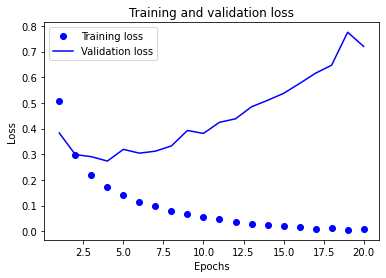

In [37]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

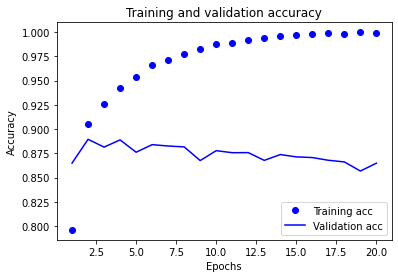

In [39]:
plt.clf()
acc = history_dict["binary_accuracy"]
val_acc = history_dict["val_binary_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here, we can visualize that after the 4th epoch, the model starts overfitting. 

### RETRAINING A MODEL FROM SCRATCH WITH 4 EPOCHS :

Here a naive approach with four epochs on traning data :

In [47]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.4421 - accuracy: 0.8300
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2541 - accuracy: 0.9101
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1963 - accuracy: 0.9302
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2939 - accuracy: 0.8840


In [48]:
results

[0.2938637435436249, 0.8839600086212158]

Here with the naive approach we reached an accuracy of 88%. We could reach 95% with state-of-art approaches.

### PREDICT ON NEW DATA :

In [46]:
model.predict(x_test)

array([[0.24491522],
       [0.9997102 ],
       [0.9538953 ],
       ...,
       [0.17004135],
       [0.08937189],
       [0.68404967]], dtype=float32)